In [2]:
#Step 1: Defining the Problem

#Problem Statement

# This project aims to identify the movie genres that have been performing exceptionally well at 
# the box office over the past decade. 
# By analyzing metrics such as genres, average ratings, number of votes, runtime and sales, 
# i'll provide insights that will assist Microsoft's new movie studio in making data-driven decisions.

#let's dive in

In [9]:
#Step 2: importing the standard packages relevant to this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [10]:
#Step:3  Data Collection

df1= pd.read_csv("title.basics.csv")
df2 = pd.read_csv("title.ratings.csv")

In [11]:
#Step 4: Data Exploration -> understanding the structure and content of the data.
# a) Displaying the first few rows of the dataset

df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
# b)displaying the last few rows of the data set

df1.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [13]:
# c) checking data types and null counts 

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [108]:
# d) checking the number of rows and columns

df1.shape

(146144, 6)

In [109]:
#Step5: Handling missing data
# a) Checking missing values in each column

missing_values = df1.isnull().sum()
missing_values


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [111]:
#since the missing data is negligible and won't affect my overall data, i'll simply drop the rows with 
#the missing data.

df1.dropna(inplace=True)

In [118]:
missing_values = df1.isnull().sum()
missing_values

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [14]:
#b) dropping duplicates
df1.drop_duplicates(subset=['tconst', 'primary_title','original_title','start_year','runtime_minutes','genres'], 
                    inplace=True)
df1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [15]:
#Step 6: Data Integration
#NB before i integrate my data that is df1 and df2, 
#i'm going to clean my second dataset i.e df2 using the same steps that i did with dataset 1.

In [18]:
df2 = pd.read_csv("title.ratings.csv")

In [19]:
#Data Exploration -> understanding the structure and content of the data.
# a) Displaying the first few rows of the dataset

df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
# b)displaying the last few rows of the data set

df2.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [137]:
# c) checking data types and null counts 

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [139]:
# d) checking the number of rows and columns

df2.shape

(73856, 3)

In [140]:
 #e) Handling missing data
# 1) Checking missing values in each column

missing_values2 = df2.isnull().sum()
missing_values2

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [21]:
#2) dropping duplicates
df2.drop_duplicates(subset=['tconst','averagerating','numvotes'], inplace=True)
df2

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [22]:
#now we can go ahead and integrate the two datasets.
#since i want to keep all the colums from both datasets i'm going to merge the two datasets 
#using the outermerge.

merged_df = pd.merge(df1, df2, on='tconst', how='outer')
merged_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [ ]:
 #Handling missing data
# 1) Checking missing values in each column

In [149]:
missing_values3 = merged_df.isnull().sum()
missing_values3

tconst                 0
primary_title       8136
original_title      8136
start_year          8136
runtime_minutes     8136
genres              8136
averagerating      46512
numvotes           46512
dtype: int64

In [24]:
#The missing data is about 38%. in as much as this is a significant figure, 
#given the clean dataset that i have, i believe i can come up with an insightful conclusion.

merged_df.dropna(inplace=True)

In [152]:
#confirming whether the missing values were dropped

missing_values3 = merged_df.isnull().sum()
missing_values3

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [25]:
#b) dropping duplicates
merged_df.drop_duplicates(subset=['tconst', 'primary_title','original_title','start_year','runtime_minutes', 
                                  'genres', 'averagerating','numvotes'], inplace=True)
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


In [ ]:
#Step 7: Exploratory Data Analysis (EDA)

In [26]:
merged_df.shape

(65720, 8)

In [27]:
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [ ]:
 #ratings and number of votes can be used to explore people's preferences and unveil behavioral patterns.
    
# The table above shows summary statistics which provides insights about potential outliers,data distribution 
#and central tendencies.
#The following are the insights from my datasets.
    #1.The maximum runtime is 51,420 minutes, 
       #This appears to be an outlier since the average movie run time is about 95 mins.
    #2. The maximum number of votes is 1,841,066, 
        # This indicates that the dataset includes some highly voted movies,
        # i'm going to focus on this and try to understand what kind of genre is more popular 

In [29]:
#Now let's take care of our potential outliers. shall we?
#let's locate the outlier and find out its genre.

merged_df[merged_df.runtime_minutes == 51420]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17.0


In [ ]:
#The result shows that the genre is Documentary. From common knowledge there's no 
# documentary which can run for approximately (51420/60) = 857 hrs.
# i think it's safe to get rid of this line, it won't affect our data in any way.

In [30]:
#so i did a bit of research and found out that longest movie in the recent time was about 1265 mins, 
# (https://en.wikipedia.org/wiki/List_of_longest_films)

#so i'm going to set my threshold at 1265 and then filter my dataframe 
#to exclude the rows where my dataframe exceeds the threshold

threshold = 1265

filtered_merged_df = merged_df[merged_df['runtime_minutes'] <= threshold]



In [31]:
filtered_merged_df.shape

(65717, 8)

In [ ]:
#Now that we've taken care of the outliers let's explore the distribution of our genre.
#To identify the most common genre/s let's visualize it by creating a bar plot.



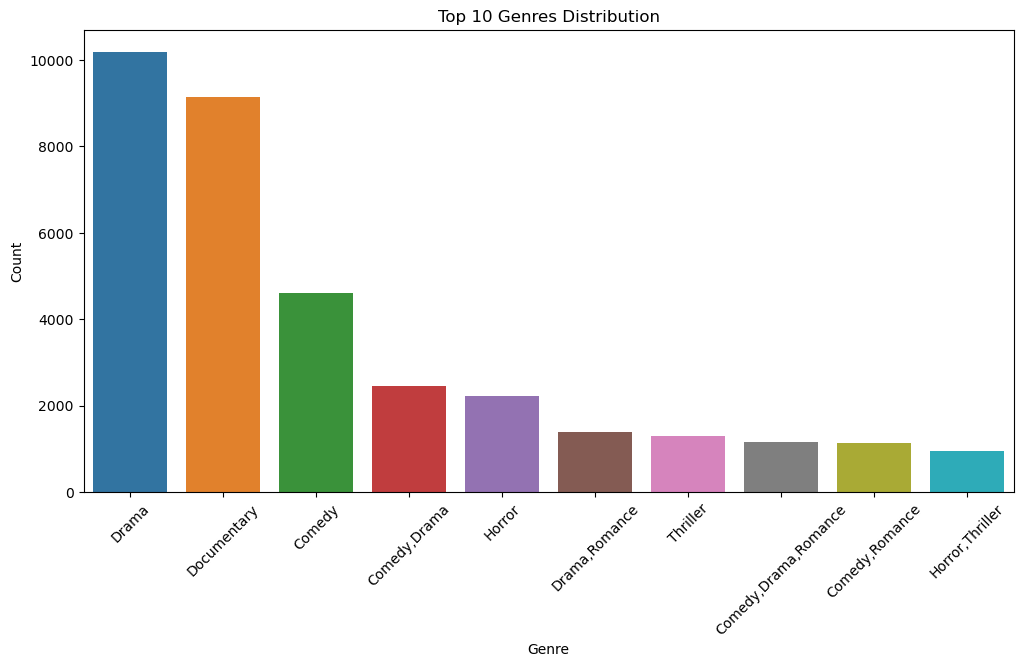

In [32]:
# My dataframe is basically too huge to fit into a single graph, for better visualization 
#i'll stick to the top ten genres.
# using this line of code (df['column_name'].value_counts().nlargest(top_n))
# which helps us choose the number of top 'column_name' to visualise and i set mine to the top ten 

top_n = 10  # 

top_genres = filtered_merged_df['genres'].value_counts().nlargest(top_n)

# Let's try creating our bar graph again.(finger's crossed)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [33]:
#showing summary of the above bar graph
filtered_merged_df['genres'].value_counts().nlargest(top_n)

Drama                   10188
Documentary              9147
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Name: genres, dtype: int64

In [35]:

#let's have some fun and get some genre specific insights.

#I want to go deeper and analyze the tope five genres,
# and calculate the top five genre specific statistical summary for runtime_minutes, 
# average rating and number of votes and then create a box plot to visualize the same.

#I'll start by filtering Drama then do a statistical summary to get some insights and finally visualize it.
#i know the process is going to repetitive but bare with me, we're trying to crack a code here.

drama_data = filtered_merged_df[filtered_merged_df['genres'] == 'Drama']
drama_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451.0
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120.0
17,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
...,...,...,...,...,...,...,...,...
145933,tt9887568,Turned Out,Turned Out,2019,131.0,Drama,8.9,8.0
146030,tt9900388,Hansa Ek Sanyog,Hansa Ek Sanyog,2019,135.0,Drama,7.8,8.0
146069,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505.0
146070,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600.0


In [36]:
drama_summary = drama_data[['runtime_minutes', 'averagerating', 'numvotes']].describe()
drama_summary


,runtime_minutes,averagerating,numvotes
count,10188.000000,10188.000000,10188.000000
mean,97.501963,6.485542,818.821260
std,22.073133,1.202345,9230.899327
min,9.000000,1.000000,5.000000
25%,85.000000,5.800000,16.000000
50%,95.000000,6.500000,52.000000
75%,107.000000,7.200000,203.000000
max,601.000000,9.900000,422671.000000


In [ ]:
#let's have a look at the general distribution of ratings in the drama genre.

#i'll do a boxplot for that.

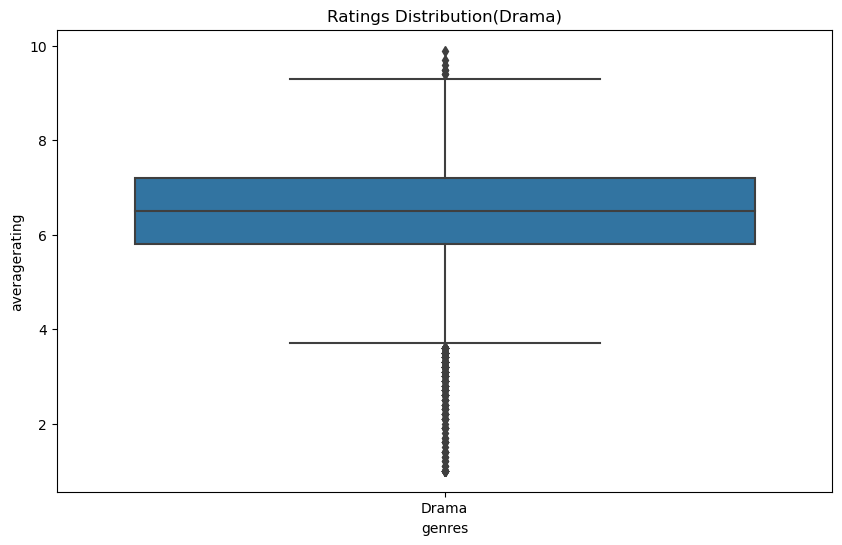

In [37]:
# Box plots for the genre-specific data (Drama)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genres', y='averagerating', data=drama_data)
plt.title('Ratings Distribution(Drama)')
plt.xticks(rotation=360)
plt.show()

In [ ]:
#The above boxplot suggest that:
# a) That the Drama movies in this dataset tend to have average ratings clustered around 6.5, 
    # with moderate variability within the genre.
# b) absence of outliers.

In [ ]:
#From the summary table above we can note the following points:
# a) That the avg runtime is 97.5 mins, the shortest drama movie lasted for 
     # 9 mins while the longest one lasted for 601 mins
# b) The avg ratings was about 6.5, the best rating stands at 9.9 
     #while the least rated drama movie averaged at 1.0
# c) i've also noticed an interesting pattern between runtime,average ratings and number of votes.
      # The longest movie has the highest ratings and highest number of votes 
    #while the shortest movie has the least number of ratings and the least number of votes. 
   #This observation is spread across all percentiles as observed in the summary table.



In [ ]:
#let's do a scatter plot and visualize these findings.

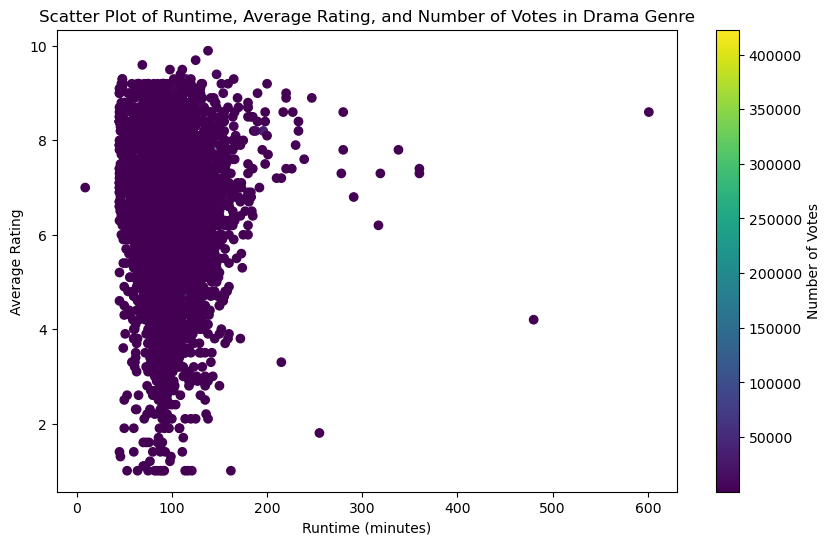

In [38]:

plt.figure(figsize=(10, 6))
plt.scatter(drama_data['runtime_minutes'], drama_data['averagerating'], c=drama_data['numvotes'], cmap='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime, Average Rating, and Number of Votes in Drama Genre')
plt.colorbar(label='Number of Votes')
plt.show()


In [ ]:
#let's see the statistical sumarry and data visualization of the other four genres 
#using the same steps before we make any conclusions
#in the following order:
#Documentary
#Comedy
#Comedy/Drama
#Horror

In [39]:
documentary_data = filtered_merged_df[filtered_merged_df['genres'] == 'Documentary']
documentary_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0
24,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22.0
84,tt0417750,Hempsters: Plant the Seed,Hempsters: Plant the Seed,2010,90.0,Documentary,7.5,107.0
96,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14.0
...,...,...,...,...,...,...,...,...
146071,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,13.0
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0


In [40]:
documentary_summary = documentary_data[['runtime_minutes', 'averagerating', 'numvotes']].describe()
documentary_summary

,runtime_minutes,averagerating,numvotes
count,9147.000000,9147.000000,9147.000000
mean,81.765825,7.267410,192.497650
std,30.119603,1.108864,1052.951719
min,4.000000,1.000000,5.000000
25%,65.500000,6.700000,9.000000
50%,81.000000,7.300000,19.000000
75%,92.000000,8.000000,65.000000
max,746.000000,10.000000,34387.000000


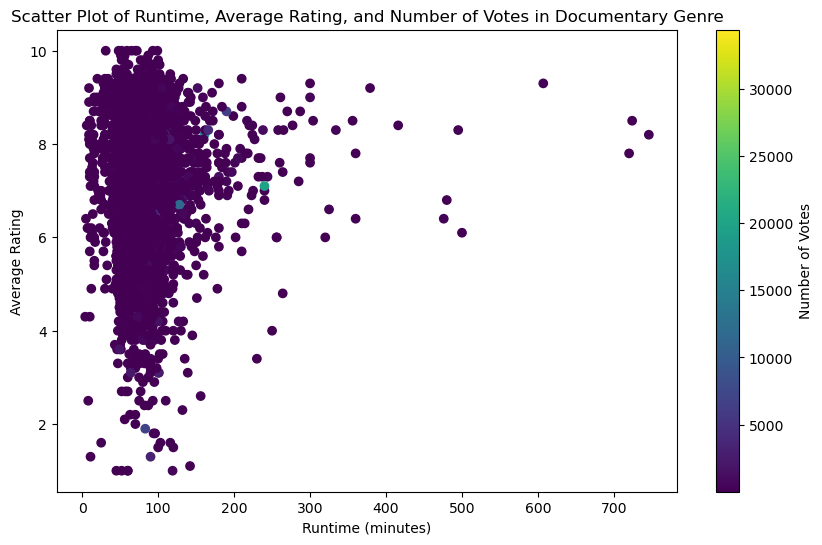

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(documentary_data['runtime_minutes'], documentary_data['averagerating'], 
            c=documentary_data['numvotes'], cmap='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime, Average Rating, and Number of Votes in Documentary Genre')
plt.colorbar(label='Number of Votes')
plt.show()

In [42]:
comedy_data = filtered_merged_df[filtered_merged_df['genres'] == 'Comedy']
comedy_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0
92,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114.0,Comedy,5.9,91546.0
98,tt0432010,The Queen of Sheba Meets the Atom Man,The Queen of Sheba Meets the Atom Man,2018,110.0,Comedy,7.1,47.0
133,tt0452664,Party Crashers,Os Penetras,2012,88.0,Comedy,5.4,907.0
184,tt0476023,Stiffs,Stiffs,2010,104.0,Comedy,7.3,64.0
...,...,...,...,...,...,...,...,...
145951,tt9890052,Thai Curry,Thai Curry,2019,127.0,Comedy,5.0,23.0
146001,tt9894894,Kaviar,Kaviar,2019,100.0,Comedy,8.7,9.0
146025,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5.0
146094,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy,4.2,13.0


In [43]:
comedy_summary = comedy_data[['runtime_minutes', 'averagerating', 'numvotes']].describe()
comedy_summary

,runtime_minutes,averagerating,numvotes
count,4604.000000,4604.000000,4604.000000
mean,96.187880,5.785491,1469.047785
std,18.578921,1.466171,11463.716817
min,45.000000,1.000000,5.000000
25%,86.000000,4.900000,21.000000
50%,93.000000,5.800000,82.000000
75%,103.000000,6.725000,364.250000
max,233.000000,9.600000,286341.000000


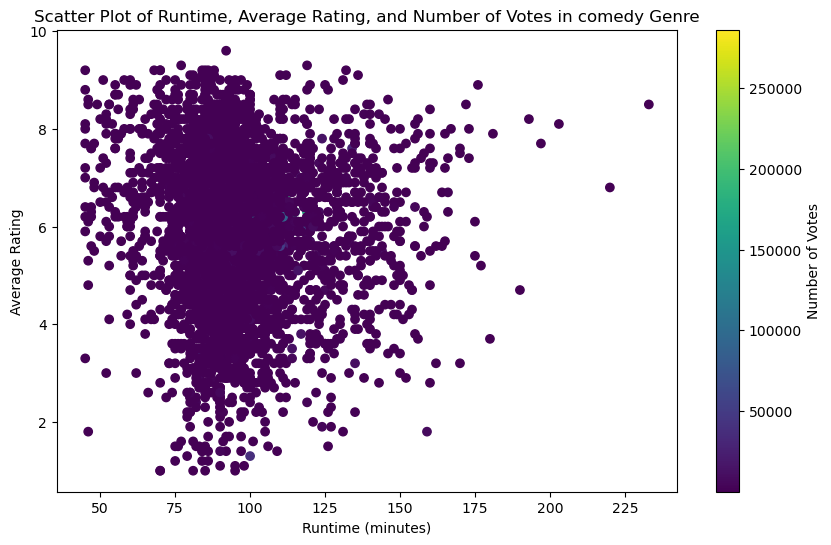

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(comedy_data['runtime_minutes'], comedy_data['averagerating'], c=comedy_data['numvotes'], 
            cmap='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime, Average Rating, and Number of Votes in comedy Genre')
plt.colorbar(label='Number of Votes')
plt.show()

In [45]:
comedy_drama_data = filtered_merged_df[filtered_merged_df['genres'] == 'Comedy,Drama']
comedy_drama_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
46,tt0331312,This Wretched Life,This Wretched Life,2010,99.0,"Comedy,Drama",7.6,59.0
52,tt0346045,Transeúntes,Transeúntes,2015,101.0,"Comedy,Drama",6.7,35.0
62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0
79,tt0407194,Seven Fallen Objects,Seven Fallen Objects,2011,90.0,"Comedy,Drama",6.5,6.0
142,tt0458413,A Long Way Down,A Long Way Down,2014,96.0,"Comedy,Drama",6.4,29260.0
...,...,...,...,...,...,...,...,...
145321,tt9800752,Till drömmarnas land,Till drömmarnas land,2019,88.0,"Comedy,Drama",6.7,17.0
145453,tt9818102,Yowis Ben 2,Yowis Ben 2,2019,109.0,"Comedy,Drama",7.6,119.0
145670,tt9853264,Chorar de Rir,Chorar de Rir,2019,104.0,"Comedy,Drama",6.7,18.0
145688,tt9854992,Saber Crecer,Saber Crecer,2017,90.0,"Comedy,Drama",6.7,9.0


In [46]:
comedy_drama_summary = comedy_drama_data[['runtime_minutes', 'averagerating', 'numvotes']].describe()
comedy_drama_summary

,runtime_minutes,averagerating,numvotes
count,2451.000000,2451.000000,2451.000000
mean,98.529988,6.368911,2631.448388
std,19.251807,1.221206,15716.631449
min,7.000000,1.000000,5.000000
25%,87.000000,5.700000,29.000000
50%,95.000000,6.400000,131.000000
75%,106.000000,7.100000,653.000000
max,220.000000,10.000000,519417.000000


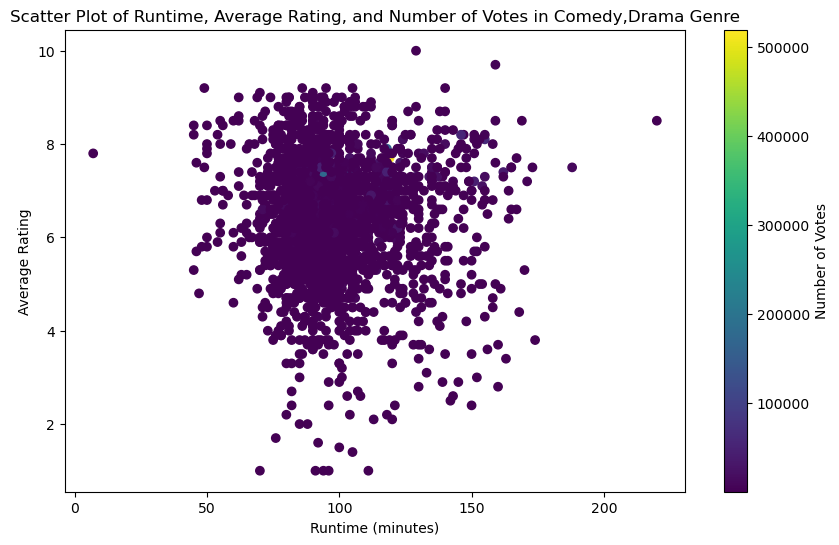

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(comedy_drama_data['runtime_minutes'], comedy_drama_data['averagerating'], 
            c=comedy_drama_data['numvotes'], cmap='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime, Average Rating, and Number of Votes in Comedy,Drama Genre')
plt.colorbar(label='Number of Votes')
plt.show()

In [48]:
horror_data = filtered_merged_df[filtered_merged_df['genres'] == 'Horror']
horror_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,5.6,2420.0
129,tt0451154,The Passing,The Passing,2011,92.0,Horror,3.4,174.0
130,tt0451201,Clawed,Sludge,2017,95.0,Horror,5.8,363.0
153,tt0462516,Satan Hates You,Satan Hates You,2010,94.0,Horror,4.6,205.0
414,tt0887143,Hyenas,Hyenas,2011,92.0,Horror,2.8,952.0
...,...,...,...,...,...,...,...,...
145485,tt9824016,Roy Kiyoshi: The Untold Story,Roy Kiyoshi: The Untold Story,2019,86.0,Horror,2.1,38.0
145514,tt9828814,MatiAnak,MatiAnak,2019,85.0,Horror,7.4,22.0
145724,tt9860860,Abduction 101,Abduction 101,2019,77.0,Horror,8.6,5.0
146033,tt9900552,The Sacred Riana: Beginning,The Sacred Riana: Beginning,2019,111.0,Horror,7.2,17.0


In [49]:
horror_summary = horror_data[['runtime_minutes', 'averagerating', 'numvotes']].describe()
horror_summary

,runtime_minutes,averagerating,numvotes
count,2232.000000,2232.000000,2232.000000
mean,85.769265,4.685573,703.725806
std,17.127677,1.476148,8048.901666
min,43.000000,1.000000,5.000000
25%,77.000000,3.600000,17.000000
50%,86.000000,4.600000,53.000000
75%,93.000000,5.700000,218.250000
max,360.000000,9.200000,338445.000000


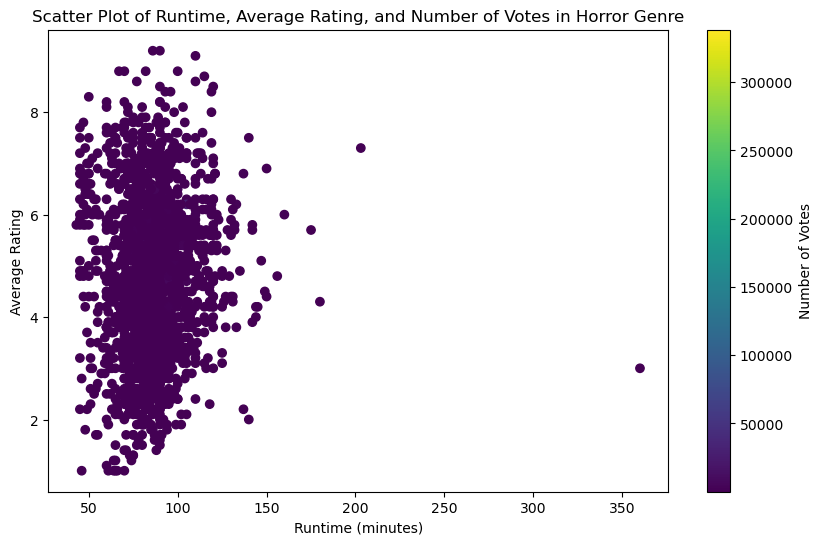

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(horror_data['runtime_minutes'], horror_data['averagerating'], c=horror_data['numvotes'], 
            cmap='viridis')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime, Average Rating, and Number of Votes in Horror Genre')
plt.colorbar(label='Number of Votes')
plt.show()

In [ ]:
#Findings:
# Our Scatter plot shows a concentrated cluster of data points.
# which might suggest a strong correlation between our variables.
# on the x-axis (Runtime in minutes) the datapoint is concentrated between 75 and 110 mins
# which suggests that runtime is an import foctor of consideration when making movies 
# and according to this data the average runtime should be between 75 and 110 mins.
# We can also deduce that the average ratings is directly propotional to the 
# number of votes especialy when we concentrate on the middle average ratings of the top 5 
# genres as shown on the scatter plots.
# (i know the last point might need more emperical justifications but i think i'll get there with time)


In [ ]:
# STEP 8: Data Modelling, 
# i would like to get a sense of the trends of these genres over the last couple of years.
# i want to know if there's a certain genre which has been gaining popularity over the years, 
# even though my earlier analysis showed us that Drama is the best prefered genre at this 
# particular point in time,i want to see the trend of it's popularity across the years 
# i.e if it has been consistent or not along with other genres.
# First i'll do a bar graph showing the trends of top 10 genres over the years 
# based on the number of movies
# and then try and see if the same reflects if i base my data on the average ratings, 
 #number of votes and the runtime
# i will plot a line graph for this for better visualization so let's dive into it.

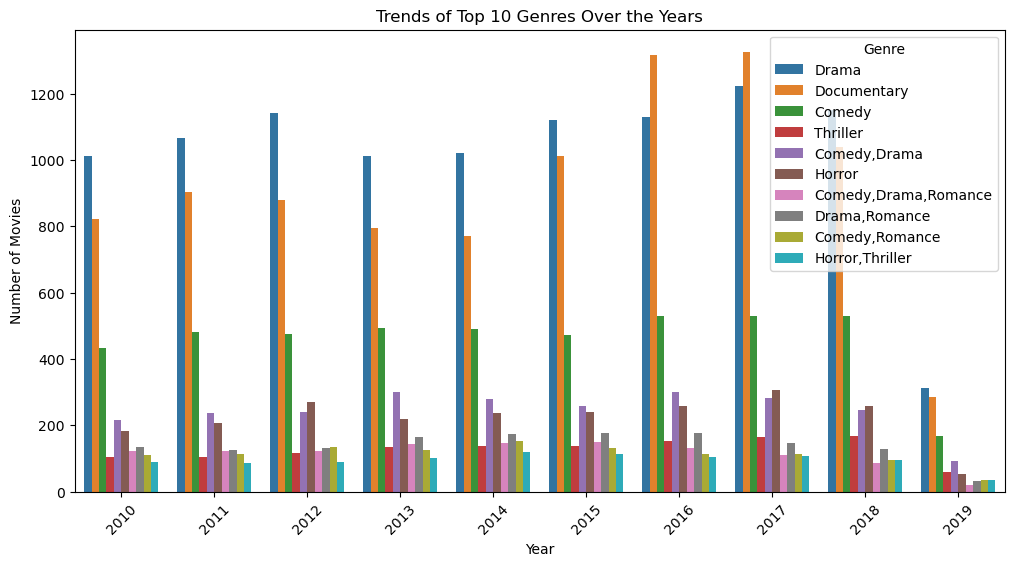

In [54]:

import warnings
warnings.filterwarnings("ignore")

# i'll start by converting my 'start year' column to datetime format

filtered_merged_df['start_year'] = pd.to_datetime(filtered_merged_df['start_year'], format='%Y')

# then create a new colum (year)

filtered_merged_df['year'] = filtered_merged_df['start_year'].dt.year

# then Count the number of movies per year

averagerating_counts_by_year = filtered_merged_df['year'].value_counts().sort_index()

# then select the top n years, i just want the top 10 genres so i'll set my N to 10.

top_n_years = 10
top_years = averagerating_counts_by_year.nlargest(top_n_years).index

# i'll then filter and select the data to focus on my top 10 genres

filtered_merged_df_top_years = filtered_merged_df[filtered_merged_df['year'].isin(top_years)]

top_n_genres = 10
top_genres = filtered_merged_df_top_years['genres'].value_counts().nlargest(top_n_genres).index

filtered_merged_df_top_genres = filtered_merged_df_top_years[filtered_merged_df_top_years['genres'].isin(top_genres)]

# Ploting the trends for the top 10 genres over the top 10 years

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_merged_df_top_genres, x='year', hue='genres')
plt.title('Trends of Top 10 Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()




In [ ]:
#findings
#From the above graph we can note that in as much as 
# Drama was the most prefered genre from 2010 to 2015, 
# There was a sharp increase in the popularity of Documentary 
# from 2014 to 2017, outperforming Drama in 2016 and 2017.
# Comedy came in third, fairly average over the years.
# According to THE HOLLYWOOD REPORTER low count of movies 
# in 2019 is explained by North American box office decline due to
#the Age of Streaming strengthening its foothold and the number of major Hollywood studios 
#decreased from six to five following the Disney-Fox merger. 
#(https://www.hollywoodreporter.com/news/general-news/us-box-office-2019-revenue-falls-4-percent-sharpest-decline-5-years-1264724/ )

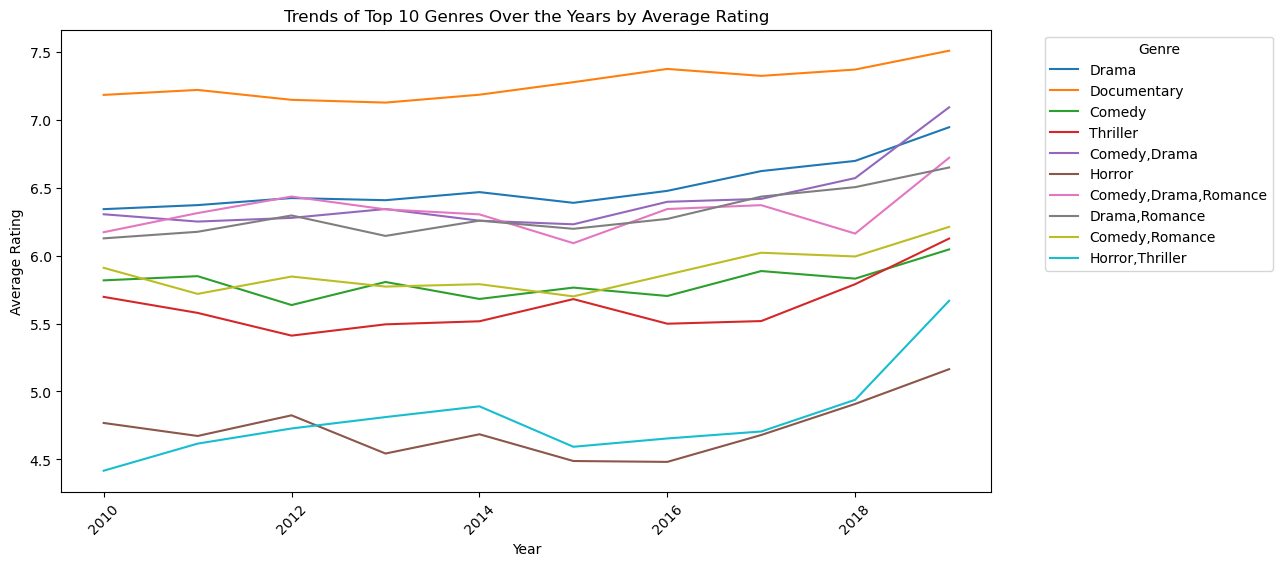

In [57]:
#Trends of TOP 10 Genres over the years by average ratings

import warnings
warnings.filterwarnings("ignore")

# Converting 'start year' to datetime format

filtered_merged_df['start_year'] = pd.to_datetime(filtered_merged_df['start_year'], format='%Y')

# Creating a new column 'year' for extracting the year

filtered_merged_df['year'] = filtered_merged_df['start_year'].dt.year

# Selecting the top N years where N = 10

top_n_years = 10
top_years = filtered_merged_df['year'].value_counts().nlargest(top_n_years).index

# Filtering and selecting the data to focus on the top N years

filtered_merged_df_top_years = filtered_merged_df[filtered_merged_df['year'].isin(top_years)]
top_n_genres = 10
top_genres = filtered_merged_df_top_years['genres'].value_counts().nlargest(top_n_genres).index

# Filtering the data to focus on the top N genres

filtered_merged_df_top_genres = filtered_merged_df_top_years[filtered_merged_df_top_years['genres'].isin(top_genres)]

# Ploting the trends for the top 10 genres over the top last few years based on average ratings

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_merged_df_top_genres, x='year', y='averagerating', hue='genres',ci =None)
plt.title('Trends of Top 10 Genres Over the Years by Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#Findings
# Going by the average ratings, Documentary has the highest average ratings over the years ranging  
# between 7.2 to 7.5 over the years.
# Drama came in second slightly above Comedy/Drama and Drama/Romance and Comedy/Drama/Romance combo. 
# This is interesting, in as much as Drama was the overall best seller,
# according to this data, Average ratings wasn't the only major factor contributing to the sales, 
# it has to be a combination of factors
# let's explore the other factors

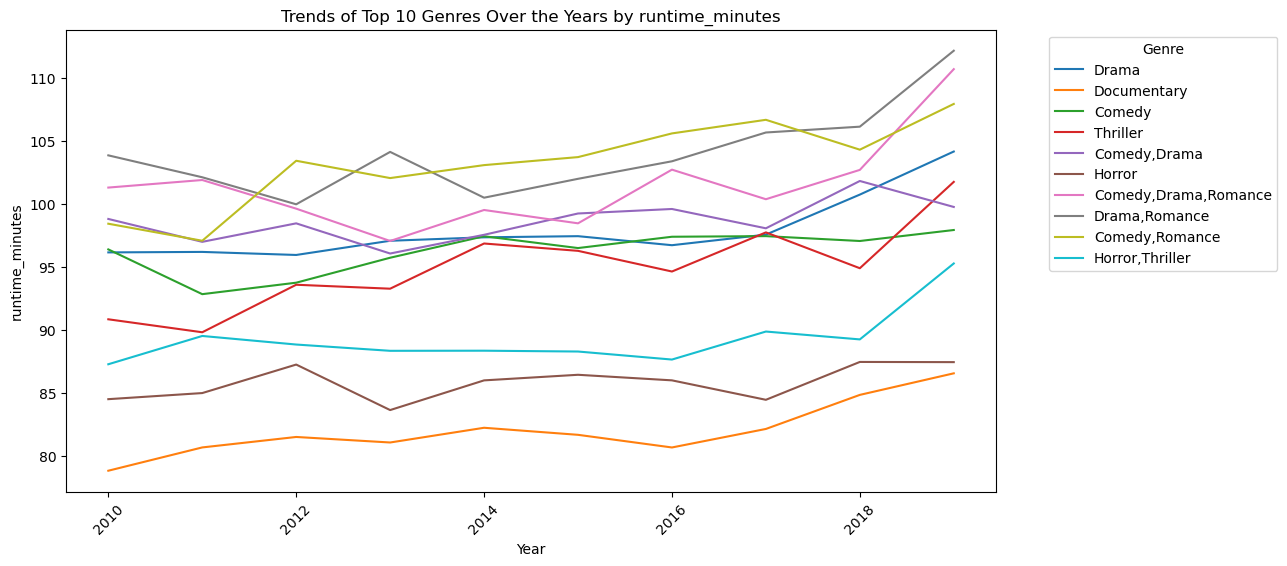

In [58]:
import warnings
warnings.filterwarnings("ignore")

# Converting 'start year' to datetime format then creating new column (year) to extract the year

filtered_merged_df['start_year'] = pd.to_datetime(filtered_merged_df['start_year'], format='%Y')

filtered_merged_df['year'] = filtered_merged_df['start_year'].dt.year

# Selecting the top N years where my N = 10 (last ten years)
top_n_years = 10
top_years = filtered_merged_df['year'].value_counts().nlargest(top_n_years).index

# Filtering the data to focus on the top N years and selecting top N genres where my N = 10

filtered_merged_df_top_years = filtered_merged_df[filtered_merged_df['year'].isin(top_years)]
top_n_genres = 10
top_genres = filtered_merged_df_top_years['genres'].value_counts().nlargest(top_n_genres).index

# Filtering the data to focus on the top N genres
filtered_merged_df_top_genres = filtered_merged_df_top_years[filtered_merged_df_top_years['genres'].isin(top_genres)]

# Ploting the trends for the top 10 genres over the top 10 years based on average ratings

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_merged_df_top_genres, x='year', y='runtime_minutes', hue='genres',ci =None)
plt.title('Trends of Top 10 Genres Over the Years by runtime_minutes')
plt.xlabel('Year')
plt.ylabel('runtime_minutes')
plt.xticks(rotation=45)
plt.legend(title='Genre',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


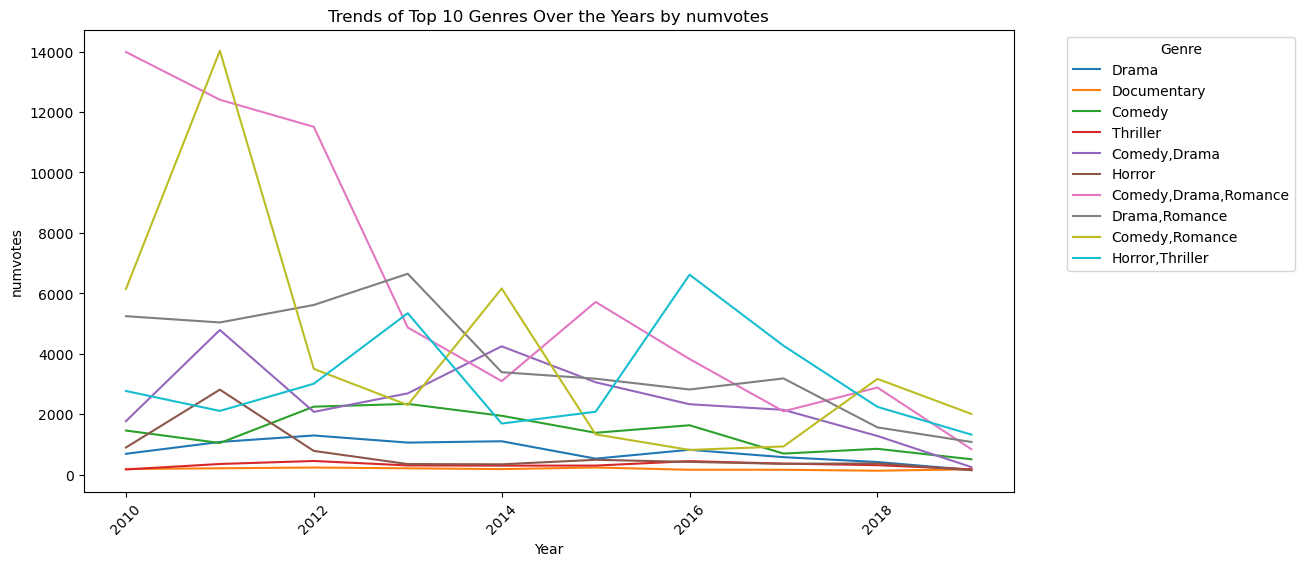

In [59]:
import warnings
warnings.filterwarnings("ignore")

# Converting 'start year' to datetime format and creating a new column (year) for extracting the year
filtered_merged_df['start_year'] = pd.to_datetime(filtered_merged_df['start_year'], format='%Y')

filtered_merged_df['year'] = filtered_merged_df['start_year'].dt.year

# Select the top N yearswhere my N = 10
top_n_years = 10
top_years = filtered_merged_df['year'].value_counts().nlargest(top_n_years).index

# Filter the data  and select top 10 genres to focus on the top 10 years
filtered_merged_df_top_years = filtered_merged_df[filtered_merged_df['year'].isin(top_years)]

top_n_genres = 10
top_genres = filtered_merged_df_top_years['genres'].value_counts().nlargest(top_n_genres).index

# Filter the data to focus on the top 10 genres
filtered_merged_df_top_genres = filtered_merged_df_top_years[filtered_merged_df_top_years['genres'].isin(top_genres)]

# Plot the trends for the top N genres over the top N years based on average ratings
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_merged_df_top_genres, x='year', y='numvotes', hue='genres',ci =None)
plt.title('Trends of Top 10 Genres Over the Years by numvotes')
plt.xlabel('Year')
plt.ylabel('numvotes')
plt.xticks(rotation=45)
plt.legend(title='Genre',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Findings
# According to the number of votes over the years both Drama and Documentary did fairly bad.
# comedy/Drama/Romance combo did fairly well with the number of votes


In [ ]:
#Step:8
#Conclusions
# The overall data suggest that Drama was the best selling genre over the past 10 years, 
# slightly followed by Documentary and then comedy.
# The data also shows that the best selling genres 
# has a runtime of between 75 and 110 mins
# in addition to this, the data shows that the number of votes 
# is not directly proportional to the success of the genre
# and that the ratings are more powerful than the number of votes 
# when it comes to more movie sales.
# Another interesting take is that the rise of movie streaming services 
# has somehow led to the decline of theater ticket sales according to hollywood post.
# According to other sources of data shared above which explains the decline of movie 
# sells in 2019 as shown in the graph above,
   # the data concludes that this was due to  Age of Streaming strengthening its 
    #foothold and the number of major Hollywood studios 
   #decreasing from six to five following the Disney-Fox merger.
   #Another recent data (https://www.cnet.com/culture/entertainment
    #/movie-theaters-didnt-die-but-theyll-never-be-the-same-again/)
   # shows that in 2020 there was 80% decline in movie sells due to covid-19, 
   # As a result, the power of traditional media has shifted to these platforms of 
    # online movie streaming services like netflix,
    # where viewers now have a way much broader range of content to choose from, 
    # and all of them are tailored to personal preferences with the help of AI algorithms.
    
    #However my data has some limitations;
    
    # 1) After the analysis i realized that my data shows the best selling genres 
      # in terms of volumes, ratings, runtime and number of votes
      # but it doesn't explain why the said genres are the best in the industry, 
      # like why do movie lovers prefer Drama and say documentary more than horror in terms of preferences
    # 2) I also realized that i limited my analysis by not working with more datasets. 
         #This would have informed us more on the profitability, strategic release dates,
        #movie title choice and so much more.    
        
      # Way Forward.
    
    # From here on, i will try and make use of more datasets for better insights.
    # in case of a similar problem i will try and formulate my analysis in a way 
    # that fits and explains what informs personal preferences inorder to help 
    # the company achieve its goals by effectively reaching out to the targeted audience without a miss.

In [ ]:
#Recommendations

#Prioritize Drama and Documentaries for production.
#Maintain a 75 to 110-minute runtime.
#Focus on average ratings over vote counts.
#Invest in online streaming services for broader audience reach.

#By implementing these findings and recommendations, 
#Microsoft's new movie studio can optimize its strategies for creating successful movies.

